# 從丁特抽紫布事件，學習二項式檢定與 P-value 解讀
* [部落格文章圖文解說](https://haosquare.com/lineagem-binomial-test-p-value/)
* 原事件內容是製作寶物，以下程式註解以「抽獎」與「中獎」代稱

In [1]:
import random
import numpy as np
from scipy.special import comb
from scipy.stats import binom, binom_test
import pandas as pd
from plotnine import ggplot, aes, geom_bar, geom_vline, geom_col, scale_y_sqrt

In [2]:
repeat_times = 5000000  # 任意設定的某個大數字
sample_size = 475       # 丁特抽了 475 次
sample_success = 11     # 丁特實際上中獎 11 次
prob = 0.1              # 母體機率，遊戲公司宣稱的中獎機率

In [3]:
# 玩玩看: np.random.binomial()
np.random.binomial(n=475, p=0.1, size=15)

array([43, 52, 42, 45, 48, 53, 37, 45, 46, 52, 47, 40, 54, 48, 47])

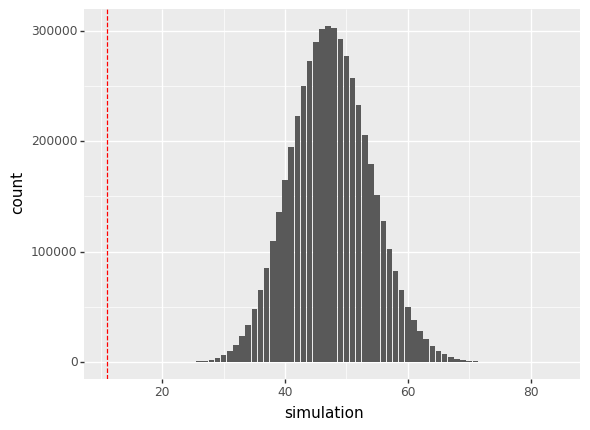

<ggplot: (8750749835785)>

In [4]:
# 抽獎模擬
np.random.seed(42)
simulation = np.random.binomial(n=sample_size, p=prob, size=repeat_times)
(ggplot(pd.DataFrame({'simulation': simulation}))
    + geom_bar(aes(x='simulation'))
    + geom_vline(xintercept=sample_success, color='red', linetype='dashed')
)

In [5]:
print(f'模擬 {repeat_times} 次，其中有 {sum(simulation <= sample_success)} 次試驗成功次數 <= {sample_success}')

模擬 5000000 次，其中有 0 次試驗成功次數 <= 11


In [6]:
# 玩玩看：scipy.special.comb()
comb(N=5, k=2, exact=True) # C 5 取 2

10

In [7]:
# 玩玩看：scipy.stats.binom
print(f"{binom.pmf(k=[11], n=475, p=0.1)[0]:.20f}") # 丁特抽紫布事件的發生率
binom.pmf(k=[11, 47], n=475, p=0.1) # 成功次數分別為 11, 47，得到各自的 PMF

0.00000000003633598717


array([3.63359872e-11, 6.10146083e-02])

In [8]:
# 以下數字加總，就是二項式檢定的 P-value
for i in binom.pmf(k=list(range(12)), n=475, p=0.1):
  print(f"{i:.20f}")

0.00000000000000000000
0.00000000000000000001
0.00000000000000000026
0.00000000000000000448
0.00000000000000005879
0.00000000000000061531
0.00000000000000535548
0.00000000000003986856
0.00000000000025914566
0.00000000000149408669
0.00000000000773604888
0.00000000003633598717


/usr/local/lib/python3.7/dist-packages/plotnine/scales/scale.py:611: PlotnineWarning: You have changed the transform of a specialised scale. The result may not be what you expect.
Original transform: sqrt
New transform: sq
  PlotnineWarning


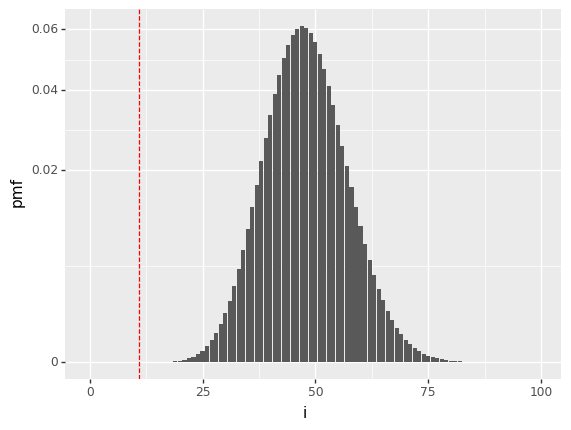

<ggplot: (8750740522453)>

In [9]:
# 二項式檢定的 P-value 視覺化
(ggplot(pd.DataFrame({'pmf': binom.pmf(k=list(range(100)), n=475, p=0.1), 'i': range(100)}))
    + geom_col(aes(x='i', y='pmf'))
    + geom_vline(xintercept=sample_success, color='red', linetype='dashed')
    + scale_y_sqrt()
)

In [10]:
# 手動計算二項式分佈機率質量函數公式
def my_binom_pmf(k, n, p):
    return comb(N=n, k=k, exact=True)*(p**k)*((1-p)**(n-k))

In [11]:
# 玩玩看：自己寫的二項式分佈 PMF
print(my_binom_pmf(11, 475, 0.1))
print(my_binom_pmf(47, 475, 0.1))

3.633598716609506e-11
0.061014608286806285


In [12]:
# 檢查：自己寫的二項式分佈 PMF 函式應該要跟 scipy.stats.binom 結果相同
for i in range(46, 49):
    print(f"成功次數: {i}")
    print(f"binom.pmf:     {binom.pmf(i, sample_size, prob):.4f}")
    print(f"my_binom_pmf:  {my_binom_pmf(k=i, n=sample_size, p=prob):.4f}\n")

成功次數: 46
binom.pmf:     0.0602
my_binom_pmf:  0.0602

成功次數: 47
binom.pmf:     0.0610
my_binom_pmf:  0.0610

成功次數: 48
binom.pmf:     0.0604
my_binom_pmf:  0.0604



In [13]:
# P-value 三種算法，確認結果相同
print(f"{sum(binom.pmf(k=list(range(12)), n=475, p=0.1)):.20f}")
print(f"{sum([my_binom_pmf(k=i, n=sample_size, p=prob) for i in range(12)]):.20f}")
print(f"{binom_test(x=11, n=475, p=0.1, alternative='less'):.20f}") # scipy 內的二項式檢定函式

0.00000000004587117129
0.00000000004587117129
0.00000000004587117129
